# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

# Challenge 1

#### Read the `employees` dataset
Save your data in a variable called `employees`.

In [102]:
employees = pd.read_csv('Employee.csv', sep=',', encoding="utf8")
employees


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [103]:
# Method 1
employees.groupby('Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [104]:
# Method 2
employees[['Department','Salary']].pivot_table(index='Department', values='Salary', aggfunc=np.mean)


,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [105]:
employees[['Department','Title','Salary']].pivot_table(values='Salary', index=['Department', 'Title'], aggfunc=np.mean)



Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [161]:
employees[['Title','Years','Salary']].pivot_table(values='Salary', index=['Title', 'Years'], aggfunc=np.mean)

Salary
Title     Years        
VP        8          70
analyst   1          35
          2          30
          4          35
associate 2          55
          3          55
          7          60

In [107]:
#Other way of displaying the same info
#replacing the NAN values to make the actual values in the table stand out.

employees[['Title','Years','Salary']].pivot_table(values='Salary', index=['Title'], columns=['Years'], aggfunc=np.mean, fill_value='-',
)

Years,1,2,3,4,7,8
Title,,,,,,
VP,-,-,-,-,-,70.0
analyst,35.0,30.0,-,35.0,-,-
associate,-,55.0,55.0,-,60.0,-


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [108]:
departments = employees[['Department','Title','Salary']].pivot_table(index=['Department','Title'], values=['Salary'],
                                                       aggfunc={'Salary':np.mean,'Title':len})

departments.rename(columns={'Title':'Employees'})

Salary  Employees
Department Title                       
HR         VP           70.0          1
           analyst      32.5          2
IT         VP           70.0          1
           analyst      32.5          2
           associate    60.0          1
Sales      associate    55.0          2

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [109]:
department_title = employees[['Department','Title','Salary']].pivot_table(index=['Department','Title'], 
                                                       aggfunc=[np.mean,max,min,np.std])
department_title

mean    max    min       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     35     30  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     35     30  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

In [110]:
"""
When position in a given dept have only 1 employee, there cannot be a standard deviation. (OBVIOUSLY)

"""

'\nWhen position in a given dept have only 1 employee, there cannot be a standard deviation. (OBVIOUSLY)\n\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [140]:
department_title = department_title.fillna(0)
department_title

mean    max    min       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     35     30  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     35     30  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [112]:
payroll_dept = employees[['Department','Salary']].pivot_table(index=['Department'], 
                                                       aggfunc=[sum,len])

payroll_dept.columns = ['Total Payroll', 'Employees']

payroll_dept

,Total Payroll,Employees
Department,,
HR,135,3
IT,195,4
Sales,110,2


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [113]:
salary_years = employees[['Department','Title','Salary','Years']].pivot_table(index=['Department','Title'], aggfunc={'Years':sum,'Salary':np.mean})

salary_years.columns = ['Mean Salary', 'Total yrs of exp']

salary_years


Mean Salary  Total yrs of exp
Department Title                                   
HR         VP                70.0                 8
           analyst           32.5                 6
IT         VP                70.0                 8
           analyst           32.5                 3
           associate         60.0                 7
Sales      associate         55.0                 5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [114]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset 
Save your data in a variable called `fitbit`.

In [141]:
fitbit = pd.read_csv('Fitbit.csv', sep=',')

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [142]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


In [143]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [144]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [147]:
fitbit['Minutes Very Active'].corr(fitbit['Steps'])


0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [118]:
import matplotlib.pyplot as plt;

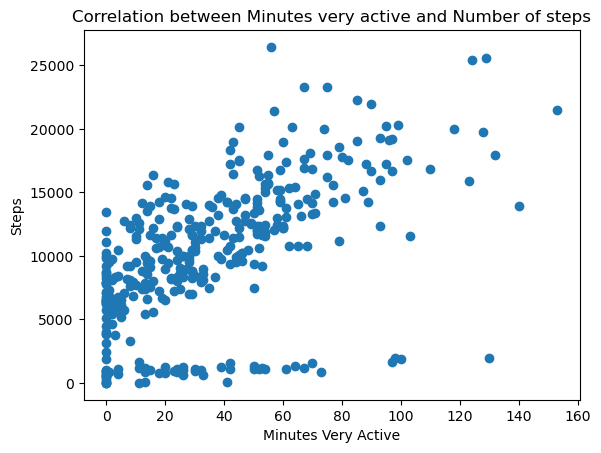

In [149]:

plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
plt.title('Correlation between Minutes very active and Number of steps')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [151]:
"""

There is some correlation between Minutes Very Active and Steps,
but there are also a number of days when the person is very active without walking/running.

"""

'\n\nThere is some correlation between Minutes Very Active and Steps,\nbut there are also a number of days when the person is very active without walking/running.\n\n'

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [150]:
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])


0.07690608062990091

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

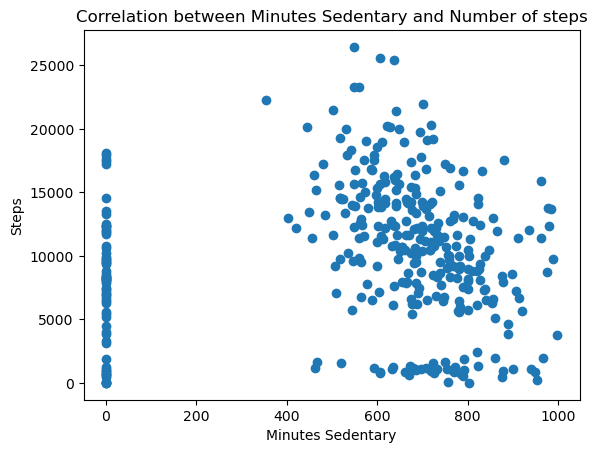

In [153]:
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.title('Correlation between Minutes Sedentary and Number of steps')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

In [123]:
"""
There is no significant correlation between Minutes Sedentary and number of steps
"""

'\nyour commments here\n'

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [154]:
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])


0.1309856595083638

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

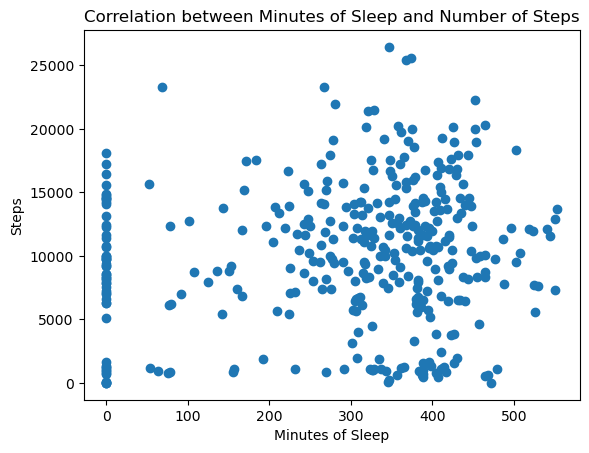

In [155]:
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])
plt.title('Correlation between Minutes of Sleep and Number of Steps')
plt.xlabel('Minutes of Sleep')
plt.ylabel('Steps')
plt.show()

In [126]:
"""
There is no correlation between Minutes of sleep and Nuber of steps
"""

'\nyour commments here\n'

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [157]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [159]:
cor_fit = fitbit[columns].corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [163]:
cor_fit['Steps'].sort_values(ascending=False)
#Steps are the most correlated with Minutes Very Active.
#Steps also has a (less significant) correlation with Floors and Calories burned.

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [165]:
time_grades = pd.read_csv('Time_Grades.csv', sep=',')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the `time_grades` dataset.

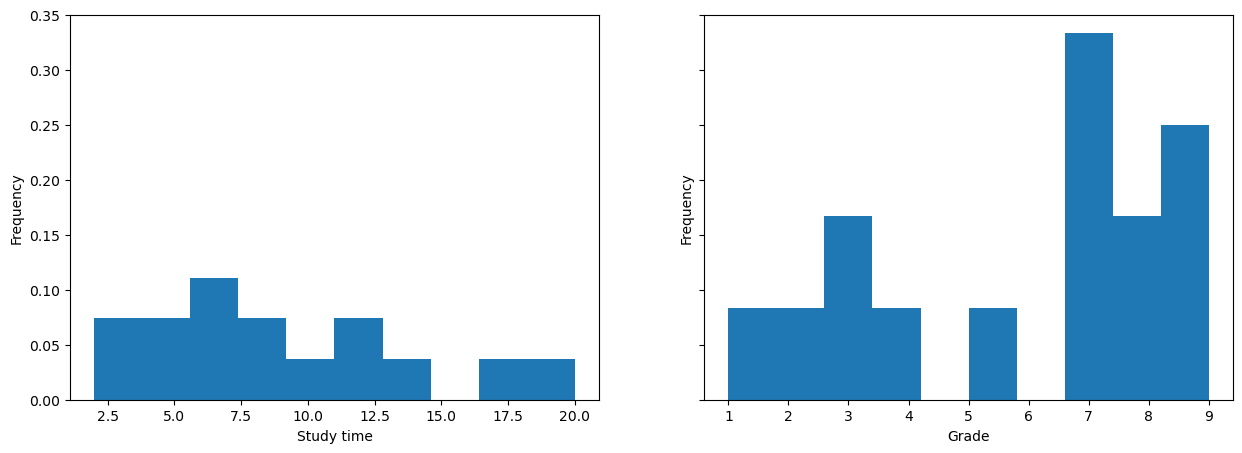

In [179]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,5))

ax1.set_xlabel("Study time")
ax1.set_ylabel("Frequency")
ax1.hist(time_grades['Study time'], density=True)


ax2.set(xlabel="Grade", ylabel="Frequency")
ax2.hist(time_grades['Grade'], density=True)

plt.show()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [181]:
time_grades['Study time'].corr(time_grades['Grade'])


0.7980456073578858

In [180]:
time_grades.corr(method='spearman')


,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [133]:
"""
There is a strong correlation between study time and grades.
"""

'\nyour commments here\n'

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

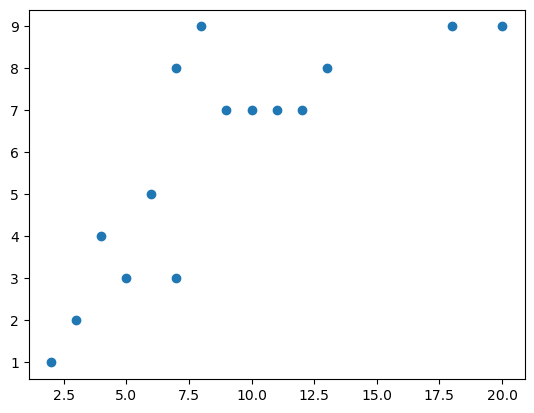

In [183]:
#plt.set(xlabel="Study Time", ylabel="Grade")
plt.scatter(time_grades['Study time'],time_grades['Grade'])

In [135]:
"""

The strong positive correlation between grades and study time suggests that students who study more
tend to achieve higher grades.

"""

'\nyour commments here\n'

#### Could you explain the difference between Pearson and Spearman correlations?

In [136]:
"""
PEARSON correlation = LINEAR correlation
SPEARMAN correlation = MONOTONIC relationship

Our Spearman correlation coefficient (0.819659) > Pearson correlation coefficient (0.798).

A higher Spearman correlation coefficient indicates that the two variables have a strong MONOTONIC relationship,
meaning that as one variable increases, the other variable tends to increase, but not necessarily proportionally.

The first hours of study time tend to bring a higher increase in grades

"""

'\nyour commments here\n'